In [3]:
import pandas as pd
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df' and 'numerical_cols' are already defined
# Check if 'Exited' column exists in the DataFrame

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Training SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Training Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter set for convergence
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")


Random Forest Accuracy: 1.0000


ValueError: The number of classes has to be greater than one; got 1 class

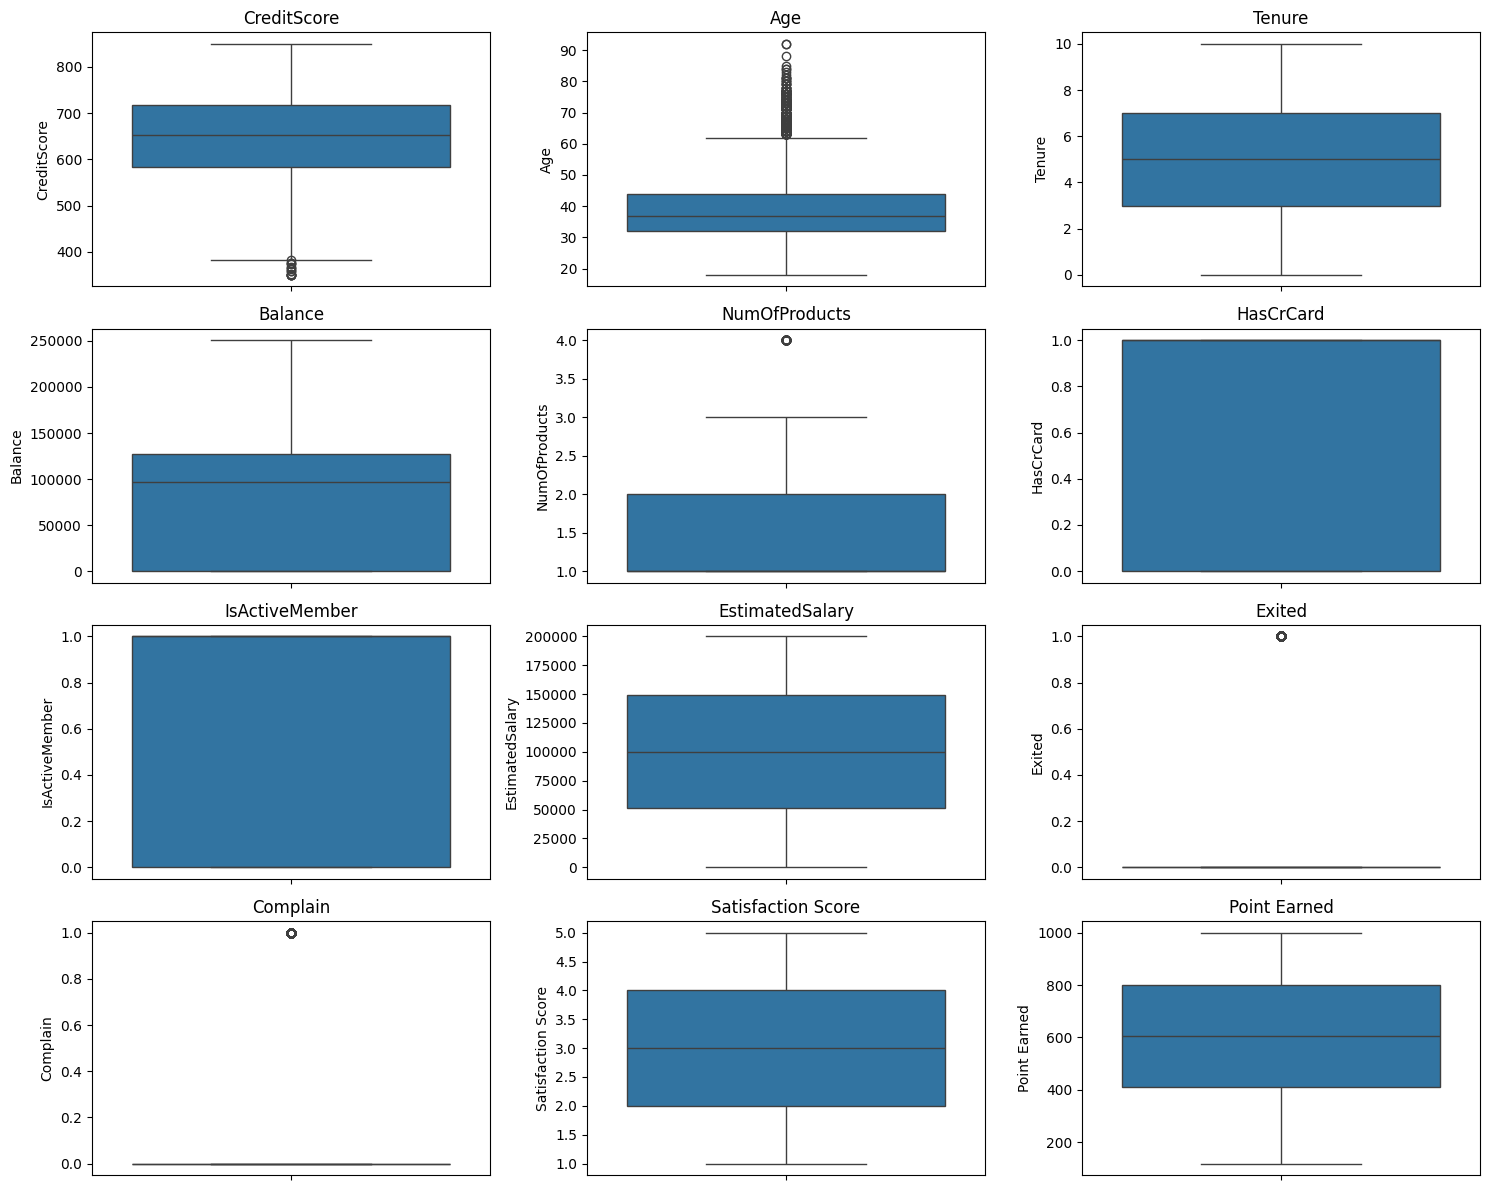

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Selecting numerical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                  "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited",
                  "Complain", "Satisfaction Score", "Point Earned"]

# Box plots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [17]:
# Detecting and removing outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


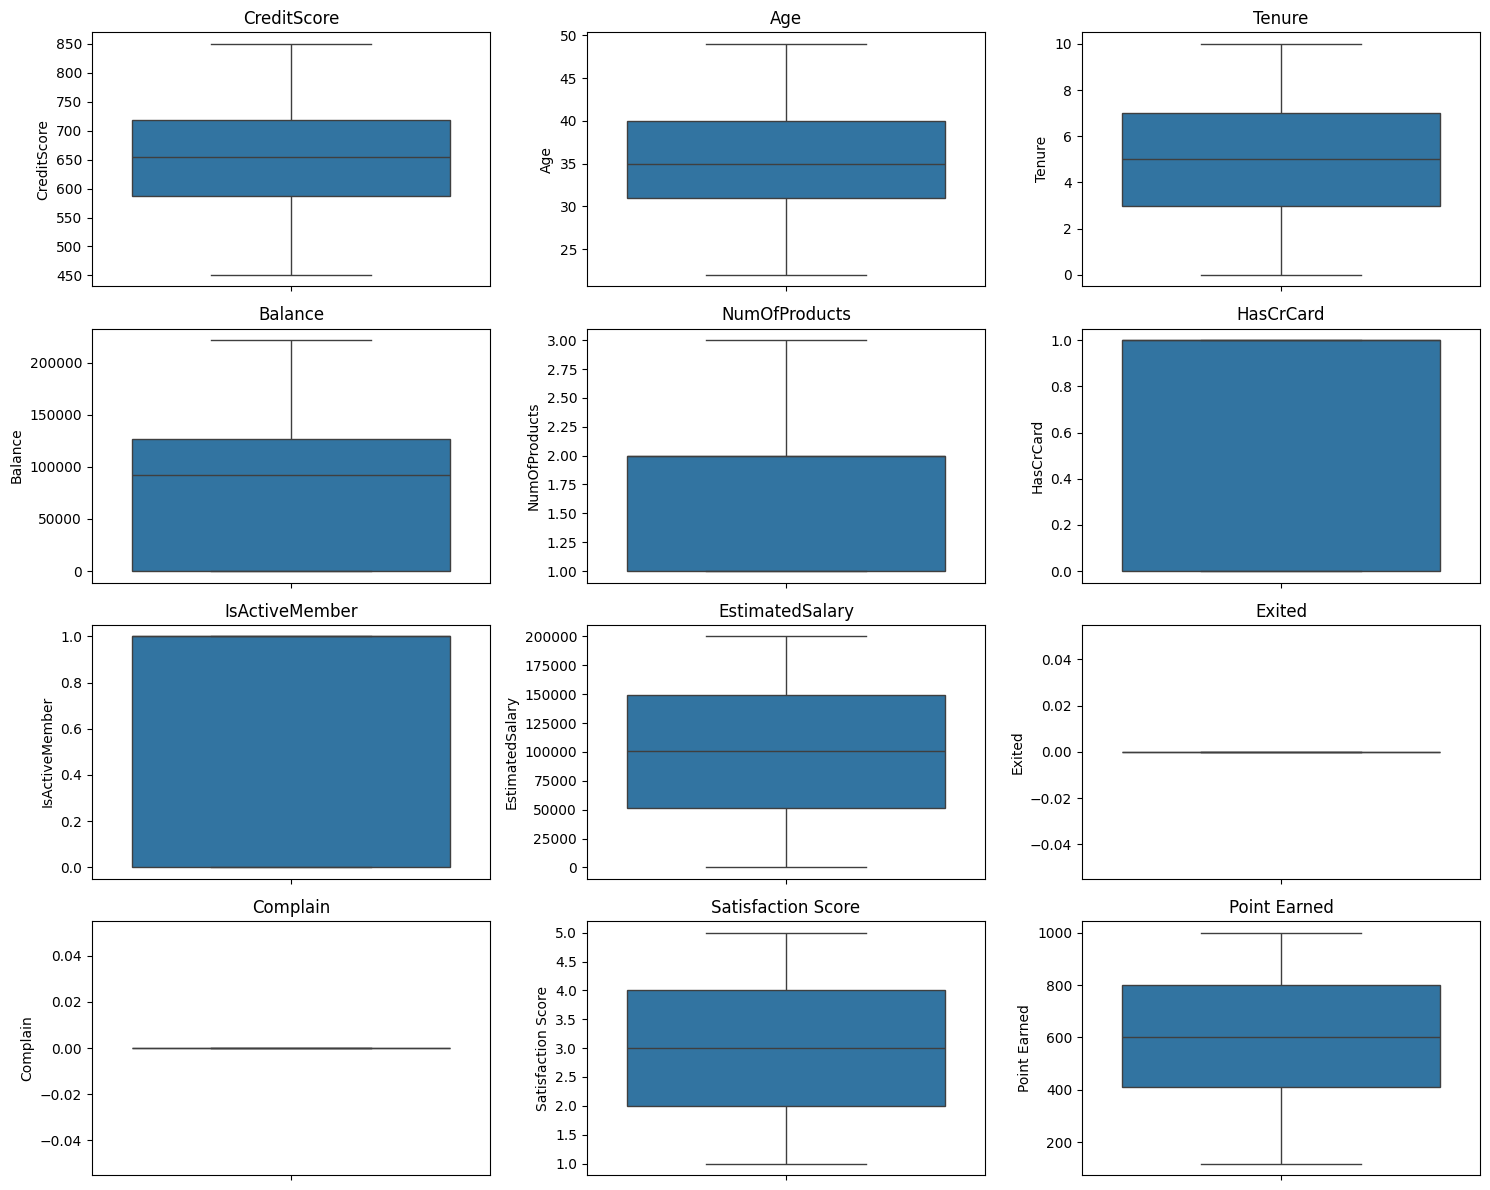

In [18]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Drop irrelevant columns
df_cleaned = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Encode categorical variables
label_encoders = {}
for col in ["Geography", "Gender", "Card Type"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Separate features and target variable
X = df_cleaned.drop(columns=["Exited"])
y = df_cleaned["Exited"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM classifier
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.9985
Random Forest Accuracy: 0.9985
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [51]:
# Class distribution after outlier removal
print("Class distribution after outlier removal:")
print(df["Exited"].value_counts())

# Splitting data into features and target variable
target = "Exited"
X = df[numerical_cols].drop(columns=[target], errors='ignore')  # Ensure no error if column is not in numerical_cols
y = df[target]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Training SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Class distribution after outlier removal:
Exited
0    7962
1    2038
Name: count, dtype: int64
Random Forest Accuracy: 0.9985
SVM Accuracy: 0.7960
